In [17]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [18]:
# function to load the simulation data from the json file
def load_config(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [19]:
config = load_config('simulation_data.json')

# Convert the json file data into a pandas DataFrame
df = pd.DataFrame(config)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.448064,0.441413,0.211024,0.243889,0.480285,0.178687,0.671297,0.474091,0.223257,0.356671,...,0.431944,0.665621,0.681483,0.794083,0.864634,0.870376,0.921571,0.284620,0.262959,0.262189
1,0.171103,0.599638,0.237261,0.200805,0.174034,0.593061,0.071205,0.183274,0.529232,0.421074,...,0.434969,0.526706,0.526706,0.526706,0.629255,0.650765,0.705474,0.297829,0.363707,0.301420
2,0.500975,0.360537,0.155331,0.559067,0.052097,0.491765,0.252784,0.539795,0.282423,0.347026,...,0.356864,0.189764,0.073162,0.351902,0.384012,0.300538,0.367577,0.314218,0.391403,0.550492
3,0.181292,0.318523,0.174573,0.218868,0.527272,0.076247,0.254969,0.096997,0.373464,0.276585,...,0.184053,0.365070,0.308451,0.288714,0.501657,0.523586,0.348324,0.117951,0.299525,0.364475
4,0.138934,0.447063,0.312910,0.141791,0.397024,0.113413,0.177511,0.213407,0.317438,0.477518,...,0.336651,0.054093,0.239444,0.543797,0.177112,0.190631,0.535083,0.416865,0.627439,0.404511


In [20]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(df, value_name="Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
df.index = df.index + 1 # this switches the x-axis labels to strat from 1 instead of 0



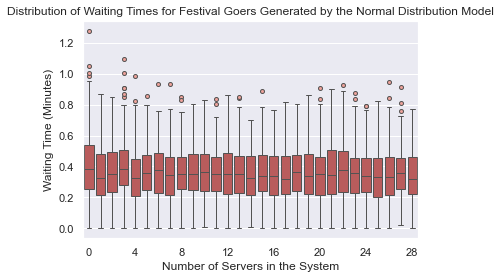

In [21]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


xticks_interval = 4
labels = ax.get_xticks()[::xticks_interval] 
ax.set_xticks(labels)

plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of Servers in the System")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

<Figure size 720x432 with 0 Axes>

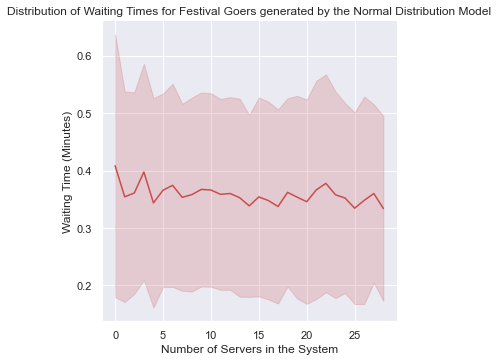

In [22]:
plt.figure(figsize=(10, 6))
sns.relplot(x=df_melted.index, y="Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c") #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of Servers in the System")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

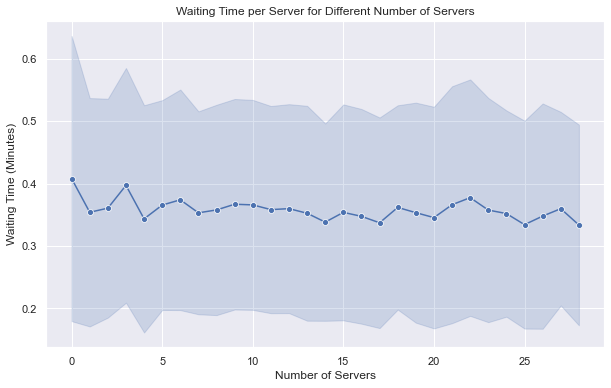

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Waiting Time', data=df_melted, marker='o', errorbar="sd")
plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

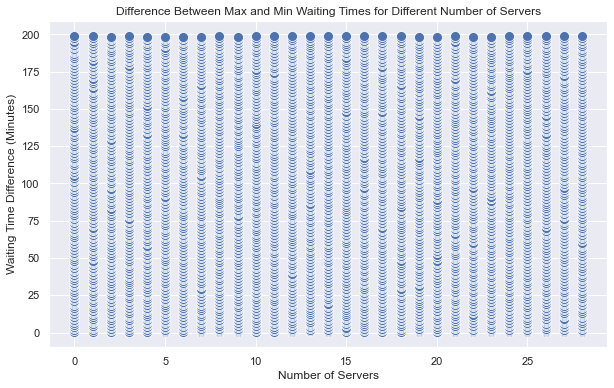

In [24]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()